# 📘 Tutorial: Using Python to Call SQL Server Stored Procedures
This tutorial teaches you how to:
- Connect Python to **SQL Server** (with Windows Authentication)
- Create and execute a stored procedure
- Fetch results into Pandas
- Do some basic analysis/visualization

We will use the **Northwind** database and the stored procedure:
```sql
CREATE PROCEDURE GetProductsByCategoryAndPrice
    @CategoryName NVARCHAR(255),
    @MinPrice MONEY,
    @MaxPrice MONEY
AS
BEGIN
    SELECT Products.ProductName, Categories.CategoryName, Products.UnitPrice
    FROM Products
    INNER JOIN Categories ON Products.CategoryID = Categories.CategoryID
    WHERE Categories.CategoryName = @CategoryName
    AND Products.UnitPrice >= @MinPrice
    AND Products.UnitPrice <= @MaxPrice;
END;
```


In [1]:
# 📌 Step 1: Install dependencies (only run once if not installed)
!pip install pyodbc pandas matplotlib

In [13]:
# 📌 Step 2: Import required libraries
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# 📌 Step 3: Connect to SQL Server using Windows Authentication
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=localhost;'
    'DATABASE=Northwind;'
    'Trusted_Connection=yes;'
)
print('✅ Connection successful!')

✅ Connection successful!


In [15]:
# 📌 Step 4: Call the stored procedure with parameters
category = 'Beverages'
min_price = 10
max_price = 50

df = pd.read_sql(
    'EXEC GetProductsByCategoryAndPrice ?, ?, ?',
    conn,
    params=[category, min_price, max_price]
)
df

C:\Users\guo7407\AppData\Local\Temp\ipykernel_31160\3503905568.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(


,ProductName,CategoryName,UnitPrice
0,Chai,Beverages,18.0
1,Chang,Beverages,19.0
2,Sasquatch Ale,Beverages,14.0
3,Steeleye Stout,Beverages,18.0
4,Chartreuse verte,Beverages,18.0
5,Ipoh Coffee,Beverages,46.0
6,Laughing Lumberjack Lager,Beverages,14.0
7,Outback Lager,Beverages,15.0
8,Lakkalikööri,Beverages,18.0


In [16]:
# 📌 Step 5: Explore the results
print('Number of rows returned:', len(df))
print('Column names:', df.columns.tolist())

df.head()

Number of rows returned: 9
Column names: ['ProductName', 'CategoryName', 'UnitPrice']


,ProductName,CategoryName,UnitPrice
0,Chai,Beverages,18.0
1,Chang,Beverages,19.0
2,Sasquatch Ale,Beverages,14.0
3,Steeleye Stout,Beverages,18.0
4,Chartreuse verte,Beverages,18.0


In [17]:
# 📌 Step 6: Simple analysis - average price per category
avg_price = df.groupby('CategoryName')['UnitPrice'].mean()
print(avg_price)

CategoryName
Beverages    20.0
Name: UnitPrice, dtype: float64


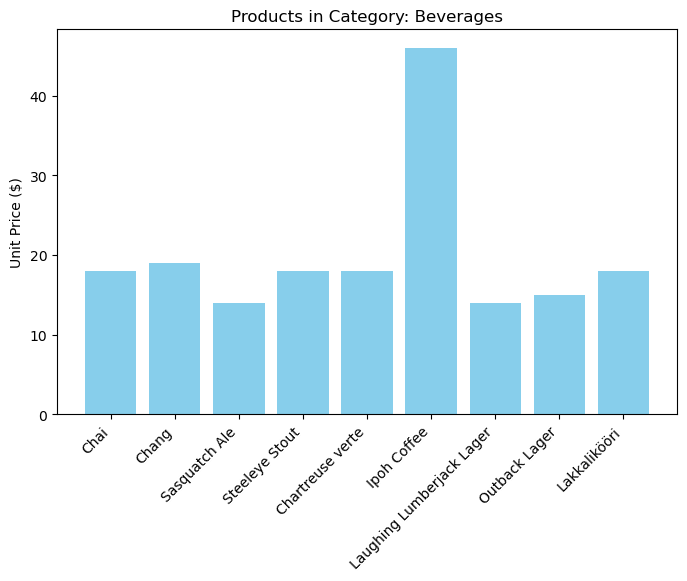

In [18]:
# 📌 Step 7: Visualization - Product prices
plt.figure(figsize=(8,5))
plt.bar(df['ProductName'], df['UnitPrice'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title(f'Products in Category: {category}')
plt.ylabel('Unit Price ($)')
plt.show()

In [8]:
# 📌 Step 8: Wrap it into a reusable function
def get_products_by_category(category, min_price, max_price, connection):
    query = 'EXEC GetProductsByCategoryAndPrice ?, ?, ?'
    return pd.read_sql(query, connection, params=[category, min_price, max_price])

# Example call
result_df = get_products_by_category('Condiments', 5, 30, conn)
result_df

C:\Users\guo7407\AppData\Local\Temp\ipykernel_31160\2890929084.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, connection, params=[category, min_price, max_price])


,ProductName,CategoryName,UnitPrice
0,Aniseed Syrup,Condiments,10.00
1,Chef Anton's Cajun Seasoning,Condiments,22.00
2,Chef Anton's Gumbo Mix,Condiments,21.35
3,Grandma's Boysenberry Spread,Condiments,25.00
4,Genen Shouyu,Condiments,15.50
5,Gula Malacca,Condiments,19.45
6,Sirop d'érable,Condiments,28.50
7,Louisiana Fiery Hot Pepper Sauce,Condiments,21.05
8,Louisiana Hot Spiced Okra,Condiments,17.00
9,Original Frankfurter grüne Soße,Condiments,13.00


In [9]:
# 📌 Extra 1: Run a simple SELECT statement
sql_query = "SELECT TOP 10 ProductName, UnitPrice FROM Products ORDER BY UnitPrice DESC"
df_sql = pd.read_sql(sql_query, conn)
df_sql


C:\Users\guo7407\AppData\Local\Temp\ipykernel_31160\3183975835.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sql = pd.read_sql(sql_query, conn)


,ProductName,UnitPrice
0,Côte de Blaye,263.50
1,Thüringer Rostbratwurst,123.79
2,Mishi Kobe Niku,97.00
3,Sir Rodney's Marmalade,81.00
4,Carnarvon Tigers,62.50
5,Raclette Courdavault,55.00
6,Manjimup Dried Apples,53.00
7,Tarte au sucre,49.30
8,Ipoh Coffee,46.00
9,Rössle Sauerkraut,45.60


In [10]:
# 📌 Extra 2: Run a JOIN query
sql_query = """
SELECT p.ProductName, c.CategoryName, p.UnitPrice
FROM Products p
INNER JOIN Categories c ON p.CategoryID = c.CategoryID
WHERE c.CategoryName = 'Beverages'
ORDER BY p.UnitPrice;
"""
df_join = pd.read_sql(sql_query, conn)
df_join


C:\Users\guo7407\AppData\Local\Temp\ipykernel_31160\2830998459.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_join = pd.read_sql(sql_query, conn)


,ProductName,CategoryName,UnitPrice
0,Guaraná Fantástica,Beverages,4.50
1,Rhönbräu Klosterbier,Beverages,7.75
2,Laughing Lumberjack Lager,Beverages,14.00
3,Sasquatch Ale,Beverages,14.00
4,Outback Lager,Beverages,15.00
5,Lakkalikööri,Beverages,18.00
6,Steeleye Stout,Beverages,18.00
7,Chai,Beverages,18.00
8,Chartreuse verte,Beverages,18.00
9,Chang,Beverages,19.00


In [ ]:
# 📌 Step 9: Close connection when done
conn.close()

## 📝 What You Learned
- How to connect Python to SQL Server with **pyodbc**
- How to call a **stored procedure** with parameters
- How to fetch results into **Pandas**
- How to do **basic data exploration** and **visualization**
- How to wrap everything into a **reusable function**
